# HW 5
#### 國立臺灣大學 工業工程所碩士班 一年級 趙上涵 R08546036

# Q1
<img src='./picture_source/HW_6_1.png'>

# Answer
#### We compare the logistic regression and support vector machine on the ORL face dataset, with both of the classifier had reached an accuracy level at 1.0 ot 100%, which seems to well distinguish the two labels of the dataset.

In [17]:
# import models needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
# prepare the data
ORL_data = pd.read_csv('./data/ORL_data.csv')
ORL_data = shuffle(ORL_data, random_state=0)
ORL_data_X = ORL_data.iloc[:, :-1]
ORL_data_y = ORL_data.iloc[:, -1]

In [7]:
# apply logistic regression
ORL_logistic = linear_model.LogisticRegression(random_state=0, max_iter=100000)\
.fit(ORL_data_X, ORL_data_y)
result_logistic = ORL_logistic.predict(ORL_data_X)
print(result_logistic[:200])

# compute accuracy score
accuracy_logistic = ORL_logistic.score(ORL_data_X, ORL_data_y)
print('\n\nAccuracy Score:', accuracy_logistic)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1]


Accuracy Score: 1.0


In [8]:
# apply supoort vector machine algorithm

ORL_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
ORL_svm.fit(ORL_data_X, ORL_data_y)
result_svm = ORL_svm.predict(ORL_data_X)
print(result_svm[:100])

accuracy_logistic = ORL_svm.score(ORL_data_X, ORL_data_y)
print('\n\nAccuracy Score:', accuracy_logistic)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


Accuracy Score: 1.0


In [9]:
# compare the result between logistic regression and svm

correct_count = 0

for i, j in enumerate(result_logistic):
    if j == result_svm[i]:
        correct_count += 1

print(correct_count / len(result_logistic))

1.0


# Q2

<img src='./picture_source/HW_6_2.png'>

# Answers
## (a)
#### According the elbow theorum, the point that the cost decreases the most, would be the better option to choose the k value. In our case, we can not really define which point to be the elbow point and thus when k is larger, the distinguish ability of the k means classfier would be also larger.
## (b)
#### When we set k as 2, the ability of k means classifier to distinguish two gender seems to be not that well, with an accuracy at approximately 0.53.

[1503653266.4375, 1291397135.28274, 1194227594.0161858, 1113548333.334022, 1073234190.0646896, 1034626332.8296208, 996235005.8266168, 955852165.9489533, 931997858.0733422, 893282441.4852496]


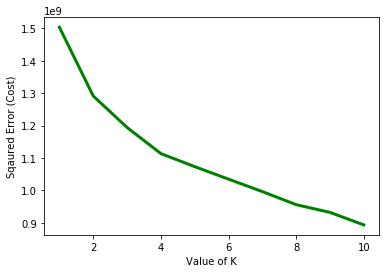

In [19]:
# function returns WSS score for k values from 1 to kmax
kenel_num = [i for i in range(1, 11)]
cost = []

for i, j in enumerate(kenel_num):
    ORL_kmeans = KMeans(n_clusters=j, random_state=0, max_iter=500).fit(ORL_data_X)
    # calculates squared error 
    # for the clustered points
    cost.append(ORL_kmeans.inertia_)
    
print(cost)

# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()

In [23]:
ORL_kmeans = KMeans(n_clusters=2, random_state=0, max_iter=10000).fit(ORL_data_X)
result_kmeans = ORL_kmeans.predict(ORL_data_X)

# calcualte accuracy
correct_count = 0
for i, j in enumerate(result_kmeans):
    if j == ORL_data_y[i]:
        correct_count += 1

if (correct_count / len(result_kmeans)) <= 0.5:
    print('Label exchanged')
    accuracy_kmeans = (1 -  (correct_count / len(result_kmeans)))
else:
    accuracy_kmeans = (correct_count / len(result_kmeans))
    
print(accuracy_kmeans)

Label exchanged
0.53
